<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/half_moon_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/@evertongomede/why-does-deep-learning-work-77cb417f93af

10/10 [==============================] - 0s 2ms/step
Accuracy: 1.0
79/79 [==============================] - 0s 1ms/step


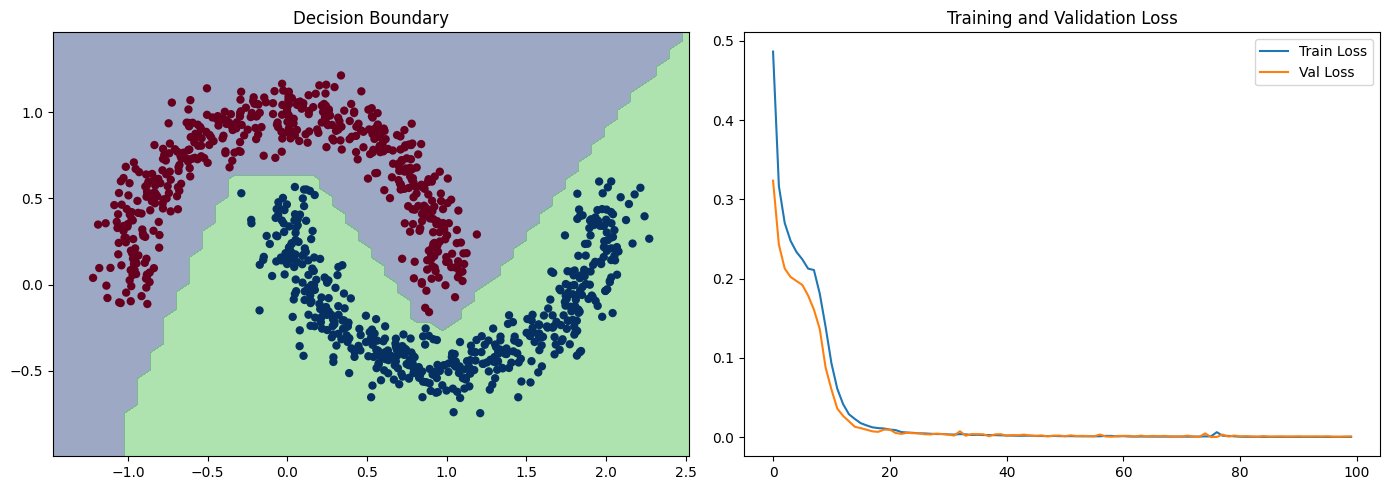

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate a Synthetic Dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Build a Deep Learning Model
model = Sequential([
    Dense(10, input_dim=2, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

# Step 4: Evaluate the Model
predictions = model.predict(X_test) > 0.5
print(f"Accuracy: {accuracy_score(y_test, predictions)}")

# Plotting
plt.figure(figsize=(14, 5))

# Plot decision boundary
plt.subplot(1, 2, 1)
plt.title("Decision Boundary")
x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
xx, yy = np.meshgrid(x_span, y_span)
grid = np.c_[xx.ravel(), yy.ravel()]
pred_func = model.predict(grid) > 0.5
z = pred_func.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.5)
plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', lw=0)

# Plot loss over epochs
plt.subplot(1, 2, 2)
plt.title("Training and Validation Loss")
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()

plt.tight_layout()
plt.show()
